Import necessary modules

In [1]:
from gpplus.test_functions.multi_fidelity import Borehole_MF_BO
from gpplus.utils import set_seed
from gpplus.preprocessing.normalizeX import standard
from gpplus.bayesian_optimizations.BO_GP_plus import BO, Visualize_BO

Define the problem-specific parameters: Here we define the index of categorical variables and lower and upper bounds of the problem for optimization

In [2]:
qual_index={8:5}
l_bound = [100,990, 700,100,0.05,10,1000,6000]            
u_bound = [1000,1110,820,10000,0.15,500,2000,12000]

Initialization: Number of initial samples from each source and the corresponding sampling cost of each source.

In [3]:
n_train_init = {'0': 5, '1': 5, '2': 50, '3': 5, '4': 50}
costs = {'0': 1000, '1': 100, '2': 10, '3':100, '4':10} 

Data generation and standardization

In [4]:
U_init, y_init = Borehole_MF_BO(True,n_train_init)           
U_init,umean, ustd = standard(U_init,qual_index)

Starting BO loop: All the components of BO, including emulator and acquisition functions are embedded in the BO function. Lots of options are defined as the inputs of BO function to enable flexible optimization. These options are detailed in the paper. Here, we stick to the default setting.

In [7]:
bestf, cost = BO(U_init,y_init,costs,l_bound,u_bound,umean,ustd,qual_index,Borehole_MF_BO)

/Users/chenya68/anaconda3/envs/gpplus-py39/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/chenya68/anaconda3/envs/gpplus-py39/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
/Users/chenya68/anaconda3/envs/gpplus-py39/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


Visualizing the performance of BO: The Visualize_BO function plots the best converged value ($y^*$) vs the cumulative convergence cost.

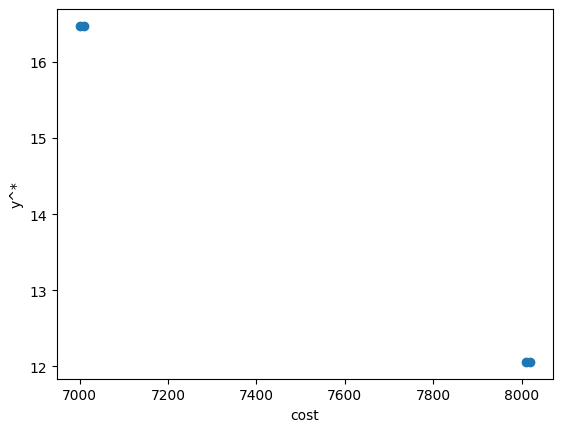

In [8]:
Visualize_BO(bestf,cost)